In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# Create DataFrame from the feature data
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_feat.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

Exploratory Data Analysis

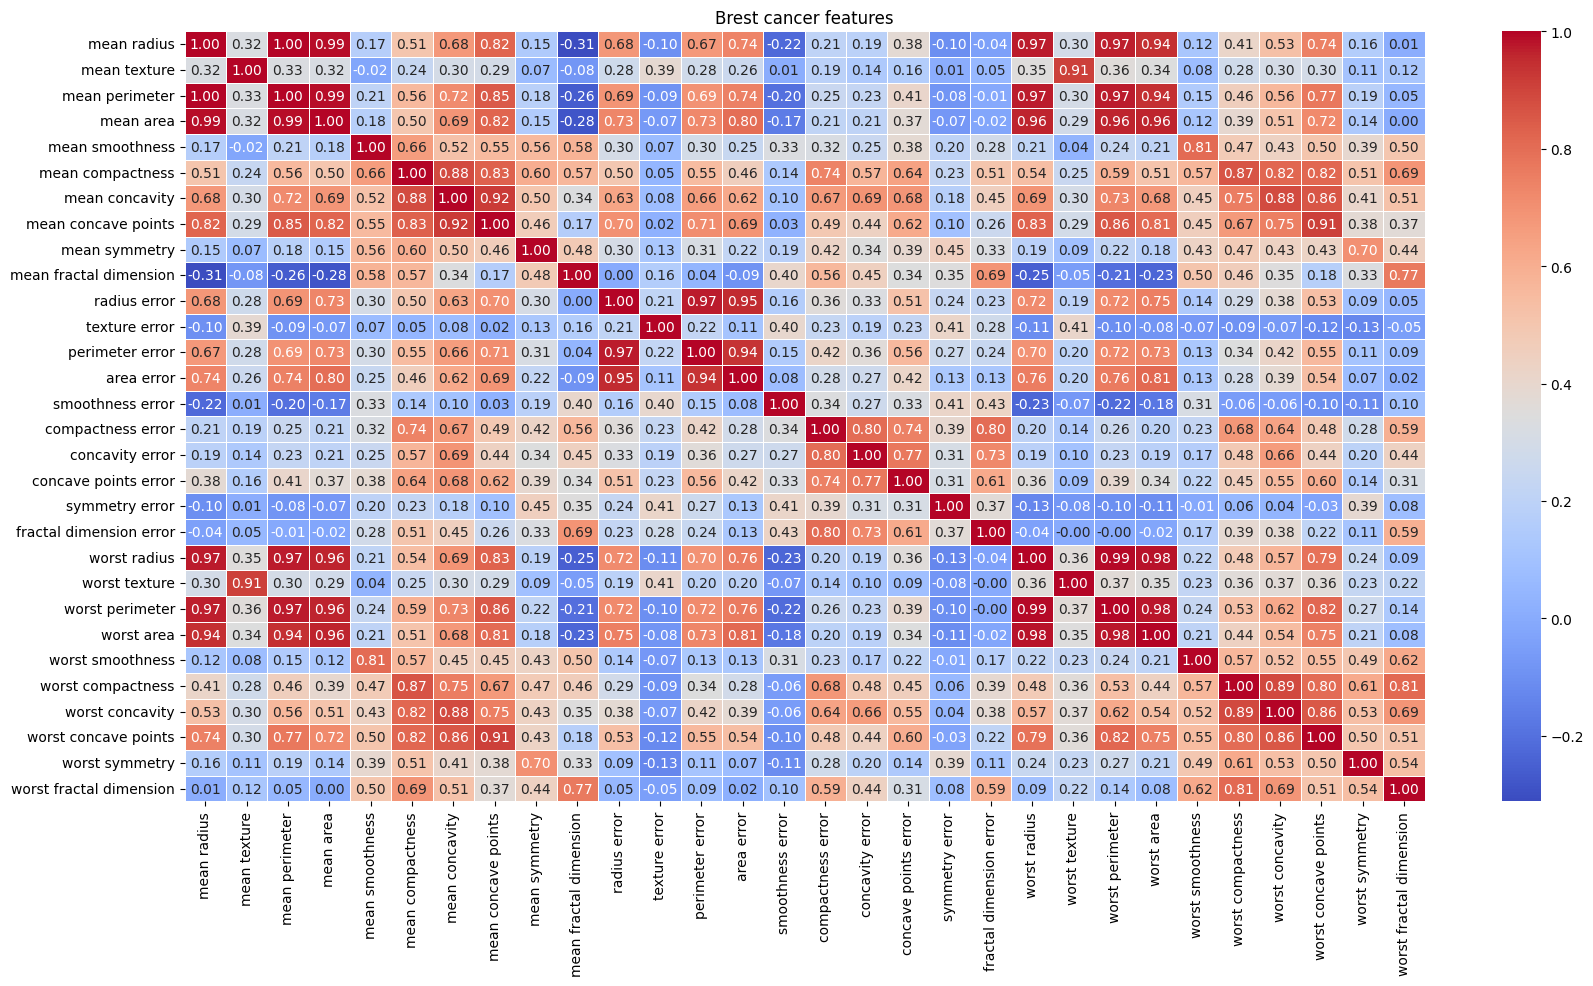

In [9]:
# Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_feat.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Brest cancer features")
plt.show()

- Malignant tumors are cancerous. They tend to grow quickly, can invade nearby tissues, and may spread to other parts of the body (a process called metastasis). These require prompt medical attention and treatment.

- Benign tumors are non-cancerous. They usually grow slowly, do not spread to other parts of the body, and are often less dangerous. However, they can still cause problems if they press on vital organs or tissues.

In [10]:
# Add and map the target column
df_feat['target'] = cancer['target']
df_feat['target'] = df_feat['target'].map({0: 'malignant', 1: 'benign'})

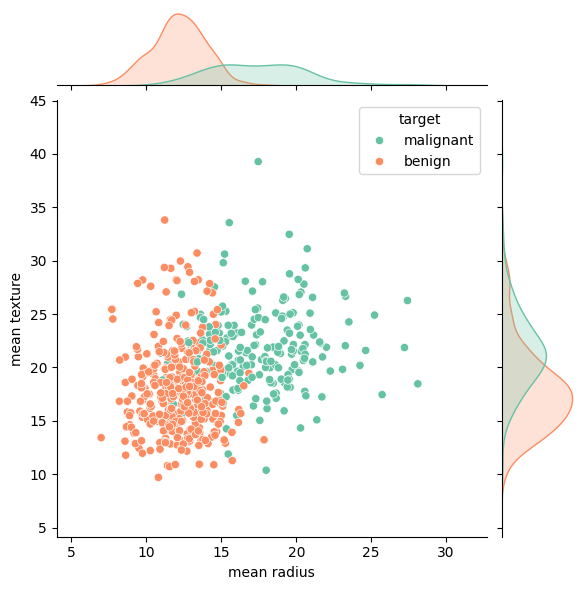

In [11]:
# Jointplot for visualizing two key features 
sns.jointplot(x = 'mean radius', y = 'mean texture', hue='target', data = df_feat , palette='Set2')

In [12]:
from sklearn.model_selection import train_test_split    

In [13]:
X = df_feat.drop('target', axis=1)
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)


#  Train basic SVM model

In [14]:
from sklearn.svm import SVC

In [15]:
svm = SVC()

In [16]:
svm.fit(X_train, y_train)

SVC()

In [17]:
# Predict 
predictions = svm.predict(X_test)

In [18]:
# evaluate
print("======== Default SVM Performance ========")
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

======== Default SVM Performance ========
[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Hyperparameter Tuning with GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.1, 0.01, 0.001, 0.0001]}

In [21]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [22]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.625 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.633 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.633 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.637 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
# Print best parameters and evaluate again
print("======== Grid Search Results ========")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

======== Grid Search Results ========
Best Parameters: {'C': 1, 'gamma': 0.0001}
Best Cross-Validation Score: 0.9472468354430379


In [24]:
# Final predictions with best estimator
grid_predictions = grid.predict(X_test)

In [25]:
print("======== Tuned SVM Performance ========")
print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

======== Tuned SVM Performance ========
[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

